In [28]:
import sys
import os.path
import cv2
import numpy as np

In [29]:
#read a csv file and turn it into a a dictionary, where the first column is the key and the second column is the value:
def read_csv(filename):
    with open(filename) as f:
        lines = f.readlines()
    return {line.split(';')[0]:line.split(';')[1].strip() for line in lines}



In [30]:
index_R = read_csv('datos_R/descriptores.csv')
i=3
print(list(index_R.keys())[i])
print(list(index_R.values())[i])


dataset_tarea1/dataset_a/r/r0519.jpg
[0.0466733, 0.013390218, 0.012641108, 0.0, 0.09463398, 0.0, 0.0, 0.0, 0.0466733, 0.14224072, 0.019183015, 0.0426958, 0.0, 0.3941189, 0.0, 0.1270398, 0.13267177, 0.16609722, 0.28455192, 0.2055852, 0.22797576, 0.0, 0.3941189, 0.15000698, 0.16916987, 0.17576435, 0.3941189, 0.11142164, 0.028427402, 0.058863577, 0.0, 0.33566737, 0.05078159, 0.12071632, 0.099016026, 0.13831909, 0.089639, 0.03506027, 0.062888496, 0.054240678, 0.263032, 0.038499154, 0.11221811, 0.16473342, 0.13400453, 0.20375276, 0.13895173, 0.118036, 0.1481752, 0.287973, 0.11773399, 0.16467461, 0.25303707, 0.287973, 0.0698325, 0.030237412, 0.023058139, 0.0407542, 0.14304751, 0.070187494, 0.055906758, 0.08652817, 0.09558603, 0.287973, 0.17465018, 0.04262174, 0.12074269, 0.287973, 0.2788527, 0.14311741, 0.19489604, 0.287973, 0.14163017, 0.09603181, 0.06943325, 0.08062325, 0.26724097, 0.087673694, 0.056324065, 0.06924939, 0.21633594, 0.17279415, 0.08711783, 0.073471166, 0.1261638, 0.26724097,

In [31]:
# una funcion que recibe una imagen, calcula su descriptor HOG y lo compara con los descriptores de la base de datos index_R:

def buscar(imagen):

    #print('Buscando imagen por similitud...')

    # leer la imagen y calcular su descriptor HOG:
    img = cv2.imread(imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 128))
    hog = cv2.HOGDescriptor()
    descriptor = hog.compute(img)

    # comparar el descriptor de la imagen con los descriptores de la base de datos:
    distancias = []
    for key in index_R.keys():
        d = np.linalg.norm(descriptor - np.array(index_R[key][1:-1].split(','), dtype=np.float32))
        distancias.append(d)

    return distancias




In [32]:
# crea una lista de imagenes jpg desde una carpeta y sus subcarpetas, solo cuando el nombre de la imagen comienza con 'q':
def get_imagenes(carpeta):
    imagenes = []
    for root, dirs, files in os.walk(carpeta):
        for file in files:
            if file.endswith('.jpg') and file.startswith('q'):
                imagenes.append(os.path.join(root, file))
    return imagenes

imagenes_query = get_imagenes('dataset_tarea1')

dataset_tarea1/dataset_a/q/q0331.jpg


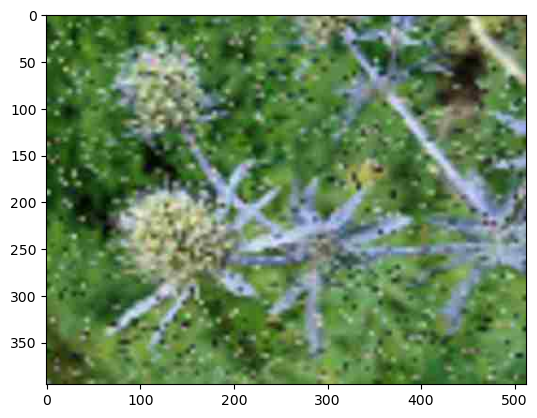

dataset_tarea1/dataset_a/r/r0619.jpg


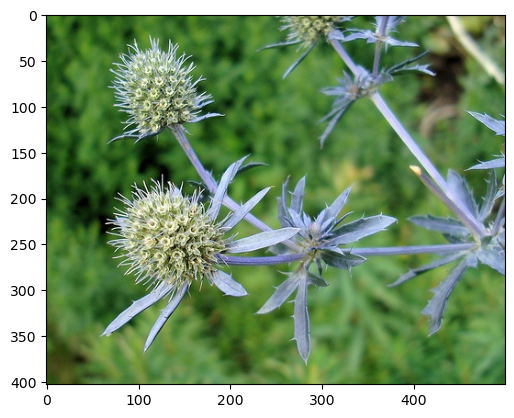

dataset_tarea1/dataset_f/r/r0352.jpg


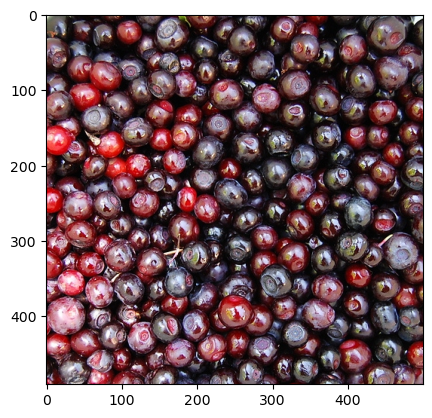

dataset_tarea1/dataset_a/r/r1698.jpg


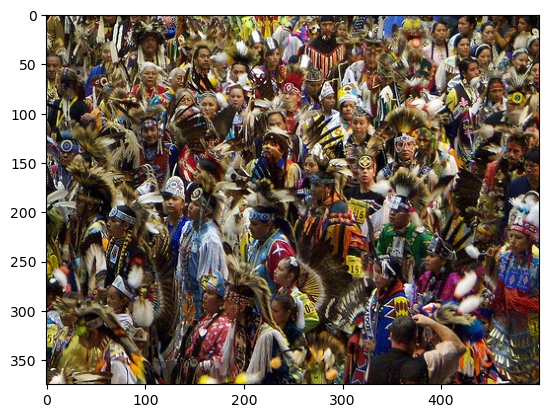

In [35]:
#pick a random image from the query set:
import random
imagen_query = random.choice(imagenes_query)

print(imagen_query)

#plotear la imagen query:
import matplotlib.pyplot as plt
img = cv2.imread(imagen_query)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


#____________________________________________________________________________

#obtener el nombre de las 5 imagenes mas parecidas:
distancias = buscar(imagen_query)
distancias = np.array(distancias)
indices = np.argsort(distancias)

#plotear las N imagenes mas parecidas:
N=3 
for i in range(N):
    print(list(index_R.keys())[indices[i]])
    img = cv2.imread(list(index_R.keys())[indices[i]])
    #img = cv2.resize(img, (64, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()




In [7]:
#pick a random image from the query set:
#import random
#imagen_query = random.choice(imagenes_query)
#print(imagen_query)

for image_q in imagenes_query:

    #obtener el nombre de las 5 imagenes mas parecidas:
    distancias = buscar(image_q)
    distancias = np.array(distancias)
    indices = np.argsort(distancias)

    print(image_q, ';', list(index_R.keys())[indices[0]], ';' ,distancias[indices[0]])



dataset_tarea1/dataset_a/q/q1055.jpg ; dataset_tarea1/dataset_a/r/r1893.jpg ; 5.971084
dataset_tarea1/dataset_a/q/q1027.jpg ; dataset_tarea1/dataset_f/r/r1809.jpg ; 4.4367137
dataset_tarea1/dataset_a/q/q1357.jpg ; dataset_tarea1/dataset_e/r/r1384.jpg ; 4.7069993
dataset_tarea1/dataset_a/q/q0489.jpg ; dataset_tarea1/dataset_a/r/r0136.jpg ; 1.8002464
dataset_tarea1/dataset_a/q/q1900.jpg ; dataset_tarea1/dataset_a/r/r1389.jpg ; 6.2338004
dataset_tarea1/dataset_a/q/q1882.jpg ; dataset_tarea1/dataset_e/r/r1894.jpg ; 5.686594
dataset_tarea1/dataset_a/q/q2095.jpg ; dataset_tarea1/dataset_f/r/r0352.jpg ; 4.1127043
dataset_tarea1/dataset_a/q/q1713.jpg ; dataset_tarea1/dataset_a/r/r0988.jpg ; 3.8881311
dataset_tarea1/dataset_a/q/q2308.jpg ; dataset_tarea1/dataset_a/r/r1505.jpg ; 5.9514484
dataset_tarea1/dataset_a/q/q1233.jpg ; dataset_tarea1/dataset_a/r/r1512.jpg ; 3.6653225
dataset_tarea1/dataset_a/q/q1621.jpg ; dataset_tarea1/dataset_c/r/r1086.jpg ; 4.117093
dataset_tarea1/dataset_a/q/q2018.jp

KeyboardInterrupt: 